In [6]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [7]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

def get_data(image_width, image_height):
    img_dir = './binary_cnn/test'
    categories = os.listdir(img_dir)

    X = []
    y = []
    index = []
    files = []
    filenames = []

    for i, category in enumerate(categories):
        img_detail = img_dir + '/' + category
        files.append(glob.glob(img_detail + "/*.jpg"))
        index.append(i)

    for file, i in zip(files, index):
        for f in file:
            img = data_generator(f, image_width, image_height)
            data = np.asarray(img)

            head, tail = os.path.split(f)
            filenames.append(tail)

            X.append(data)
            y.append(i)

    X = np.array(X)
    y = np.array(y)

    X = X.astype('float32') / 255

    print(len(X), len(y))
    
    return X, y

"""인자 바꾸기"""



'인자 바꾸기'

In [8]:
#import keras.backend.tensorflow_backend as K

#with K.tf_ops.device('/device:GPU:0'):
 #   prediction = model.predict(X)
  #  np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지



In [9]:
def print_scores(y, prediction):
    print('confusion matrix 결과')
    print(confusion_matrix(y, prediction, labels=[0, 1])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y, prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y, prediction, average=None) * 100)))

    print('evaluate값')
    print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y, prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y, prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y, prediction, average='macro') * 100))

In [10]:
import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
# batch_list = [2, 4, 8]
# epochs = []
image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
             190, 200, 210, 220, 230, 240, 256, 300]
# Dropout = []
#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

model_evaluate = []
f1 = []
precision = []
recall = []

for size in image_size: #반복문 요소 바꾸기
    X , y = get_data(size, size)
    model = load_model('./binary_cnn/models/size/binary_model_saved' + str(size) + '.h5')
    ##############파일 인자 수정하기 ##############
    with K.tf_ops.device('/device:GPU:0'):
        prediction = model.predict(X)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
    
    prediction = np.round(prediction)
    
    print('이미지 사이즈 : ' + str(size)) # 수정
    print_scores(y, prediction)
    
    model_evaluate.append(model.evaluate(X, y)[1] * 100)
    precision.append(precision_score(y, prediction, average='macro') * 100)
    recall.append(recall_score(y, prediction, average='macro') * 100)
    f1.append(f1_score(y, prediction, average='macro') * 100)
    
"""수정 필요한 부분"""

639 639
이미지 사이즈 : 32
confusion matrix 결과
[[317   2]
 [312   8]]
precision 개별값
['50.40%', '80.00%']
recall 개별값
['99.37%', '2.50%']
evaluate값
639/639 [==============================] - 1s 1ms/sample - loss: 3.6674 - acc: 0.5086
50.86%
f1 점수
35.86%
precision 평균값
65.20%
recall 평균값
50.94%
639/639 [==============================] - 0s 309us/sample - loss: 3.6674 - acc: 0.5086
639 639
이미지 사이즈 : 40
confusion matrix 결과
[[318   1]
 [307  13]]
precision 개별값
['50.88%', '92.86%']
recall 개별값
['99.69%', '4.06%']
evaluate값
639/639 [==============================] - 1s 2ms/sample - loss: 3.1262 - acc: 0.5180
51.80%
f1 점수
37.58%
precision 평균값
71.87%
recall 평균값
51.87%
639/639 [==============================] - 0s 353us/sample - loss: 3.1262 - acc: 0.5180
639 639
이미지 사이즈 : 50
confusion matrix 결과
[[317   2]
 [295  25]]
precision 개별값
['51.80%', '92.59%']
recall 개별값
['99.37%', '7.81%']
evaluate값
639/639 [==============================] - 1s 2ms/sample - loss: 3.6015 - acc: 0.5352
53.52%
f1 점수
41.25%
precisio

639/639 [==============================] - 1s 2ms/sample - loss: 3.6122 - acc: 0.6056
639 639
이미지 사이즈 : 256
confusion matrix 결과
[[312   7]
 [267  53]]
precision 개별값
['53.89%', '88.33%']
recall 개별값
['97.81%', '16.56%']
evaluate값
639/639 [==============================] - 4s 7ms/sample - loss: 3.8073 - acc: 0.5712
57.12%
f1 점수
48.69%
precision 평균값
71.11%
recall 평균값
57.18%
639/639 [==============================] - 2s 2ms/sample - loss: 3.8073 - acc: 0.5712
639 639
이미지 사이즈 : 300
confusion matrix 결과
[[309  10]
 [234  86]]
precision 개별값
['56.91%', '89.58%']
recall 개별값
['96.87%', '26.88%']
evaluate값
639/639 [==============================] - 5s 8ms/sample - loss: 3.7861 - acc: 0.6182
61.82%
f1 점수
56.52%
precision 평균값
73.24%
recall 평균값
61.87%
639/639 [==============================] - 2s 3ms/sample - loss: 3.7861 - acc: 0.6182


'수정 필요한 부분'

In [11]:
#for i, pred in enumerate(prediction):
 #   if pred >= 0.5: print("해당 " + filenames[i] + "  이미지는 비광고 로 추정됩니다.")
  #  else : print("해당 " + filenames[i] + "  이미지는 광고 로 추정됩니다.")

'수정 필요한 부분'

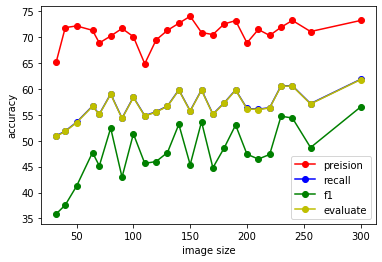

In [12]:
import matplotlib.pyplot as plt


"""수정 필요한 부분"""

plt.plot(image_size, precision, 'ro-', label='preision') # 리스트 수정
plt.plot(image_size, recall, 'bo-', label='recall')
plt.plot(image_size, f1, 'go-', label='f1')
plt.plot(image_size, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('image size') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""